### Import libraries

In [276]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading .csv file

In [277]:
df = pd.read_csv('train.csv')

In [278]:
df.direction.unique()

array(['EB', 'NB', 'SB', 'WB', 'NE', 'SW', 'NW', 'SE'], dtype=object)

In [279]:
df.shape

(848835, 6)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848835 entries, 0 to 848834
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   row_id      848835 non-null  int64 
 1   time        848835 non-null  object
 2   x           848835 non-null  int64 
 3   y           848835 non-null  int64 
 4   direction   848835 non-null  object
 5   congestion  848835 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 38.9+ MB


In [281]:
df.describe(include='all')

,row_id,time,x,y,direction,congestion
count,848835.000000,848835,848835.000000,848835.000000,848835,848835.000000
unique,NaN,13059,NaN,NaN,8,NaN
top,NaN,1991-04-01 00:00:00,NaN,NaN,EB,NaN
freq,NaN,65,NaN,NaN,156708,NaN
mean,424417.000000,NaN,1.138462,1.630769,NaN,47.815305
std,245037.702211,NaN,0.801478,1.089379,NaN,16.799392
min,0.000000,NaN,0.000000,0.000000,NaN,0.000000
25%,212208.500000,NaN,0.000000,1.000000,NaN,35.000000
50%,424417.000000,NaN,1.000000,2.000000,NaN,47.000000
75%,636625.500000,NaN,2.000000,3.000000,NaN,60.000000


In [282]:
df.isnull().sum()

row_id        0
time          0
x             0
y             0
direction     0
congestion    0
dtype: int64

In [ ]:
df['year'] = df['time'].apply(lambda row: row[:4])
df['month'] = df['time'].apply(lambda row: row.split('-')[1][:2] )
df['date'] = df['time'].apply(lambda row: row.split('-')[2][:2] )
df['hour'] = df['time'].apply(lambda row: row.split(':')[0][-2:] )
df['mins'] = df['time'].apply(lambda row: row.split(':')[1] )

In [308]:
type(df['time'][0])

str

In [284]:
#df.drop('time', axis=1, inplace=True)

In [305]:
df

,row_id,time,x,y,direction,congestion,year,month,date,hour,mins,dates
0,0,1991-04-01 00:00:00,0,0,EB,70,1991,04,1991-04-01 00,00,00,1991-04-01
1,1,1991-04-01 00:00:00,0,0,NB,49,1991,04,1991-04-01 00,00,00,1991-04-01
2,2,1991-04-01 00:00:00,0,0,SB,24,1991,04,1991-04-01 00,00,00,1991-04-01
3,3,1991-04-01 00:00:00,0,1,EB,18,1991,04,1991-04-01 00,00,00,1991-04-01
4,4,1991-04-01 00:00:00,0,1,NB,60,1991,04,1991-04-01 00,00,00,1991-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...
848830,848830,1991-09-30 11:40:00,2,3,NB,54,1991,09,1991-09-30 11,11,40,1991-09-30
848831,848831,1991-09-30 11:40:00,2,3,NE,28,1991,09,1991-09-30 11,11,40,1991-09-30
848832,848832,1991-09-30 11:40:00,2,3,SB,68,1991,09,1991-09-30 11,11,40,1991-09-30
848833,848833,1991-09-30 11:40:00,2,3,SW,17,1991,09,1991-09-30 11,11,40,1991-09-30


In [286]:
df.congestion.value_counts()

34    26498
40    19797
47    19418
29    19236
48    19013
      ...  
95      140
97      104
98       87
1        48
99       42
Name: congestion, Length: 101, dtype: int64

In [287]:
df.direction.value_counts()

EB    156708
NB    156708
SB    156708
WB    143649
NE     91413
SW     91413
NW     26118
SE     26118
Name: direction, dtype: int64

In [288]:
# def make_hist(x):
#     data = df[df['x'] == x ]
#     f, ax = plt.subplots(figsize=(17, 5))
#     ax = sns.histplot(data['congestion'], kde=True)
#     ax.set_title(f'Plot show the distribution of data at x = {x}')
#     plt.show()

<AxesSubplot:xlabel='direction', ylabel='congestion'>

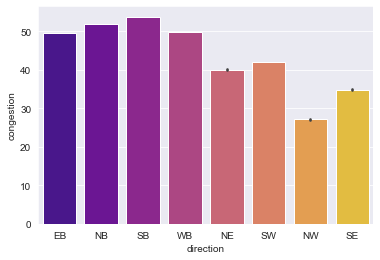

In [289]:
sns.set_style('darkgrid')
sns.barplot(x ='direction', y ='congestion', data = df, palette ='plasma')